In [21]:
#Firstly imported necessary libararies for use
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.tree import export_graphviz
import graphviz
import numpy as np
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [22]:
loan_df=pd.read_csv(r"C:\Users\kethi\Downloads\loan_approval_dataset (1).csv")
loan_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [23]:
loan_df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [24]:
loan_df.dropna(inplace=True)

In [25]:
# Checking the missing values
loan_df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [26]:
from ydata_profiling import ProfileReport

profile=ProfileReport(loan_df,title="Profiling Report2",explorative=True)

In [27]:
profile.to_file(output_file='profilereport2.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
loan_df[' loan_status'].value_counts()

 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [29]:
loan_df[' loan_status'].value_counts(normalize=True)

 loan_status
Approved    0.62216
Rejected    0.37784
Name: proportion, dtype: float64

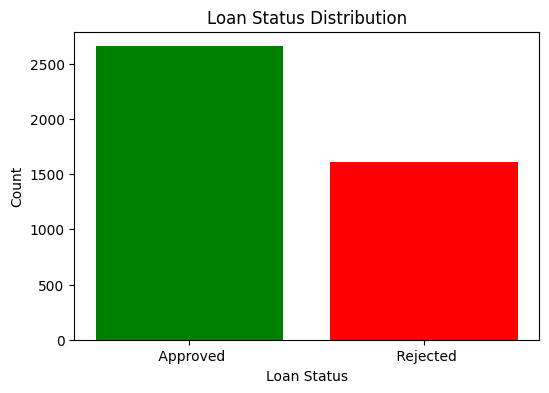

In [30]:
#Drawn the whole status of dataset
loan_status_counts = loan_df[' loan_status'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(loan_status_counts.index, loan_status_counts.values, color=['green', 'red'])
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

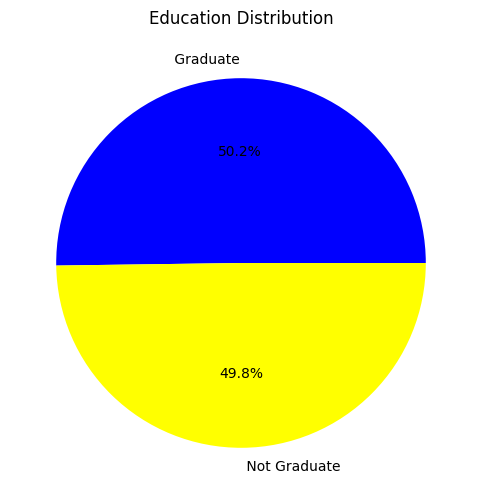

In [31]:
education_counts = loan_df[' education'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=['blue', 'yellow'])
plt.title('Education Distribution')
plt.show()


<Figure size 800x600 with 0 Axes>

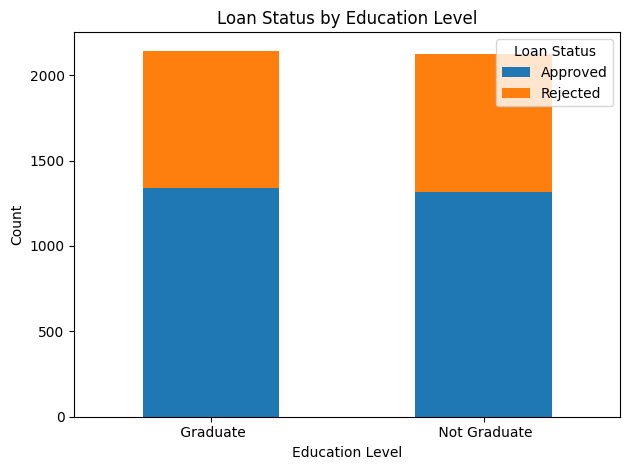

In [32]:
loan_df.columns = loan_df.columns.str.strip()

if 'education' in loan_df.columns and 'loan_status' in loan_df.columns:

    education_loan_status_counts = loan_df.groupby(['education', 'loan_status']).size().unstack()

    plt.figure(figsize=(8, 6))
    education_loan_status_counts.plot(kind='bar', stacked=True)
    plt.title('Loan Status by Education Level')
    plt.xlabel('Education Level')
    plt.ylabel('Count')
    plt.legend(title='Loan Status', loc='upper right', labels=['Approved', 'Rejected'])
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

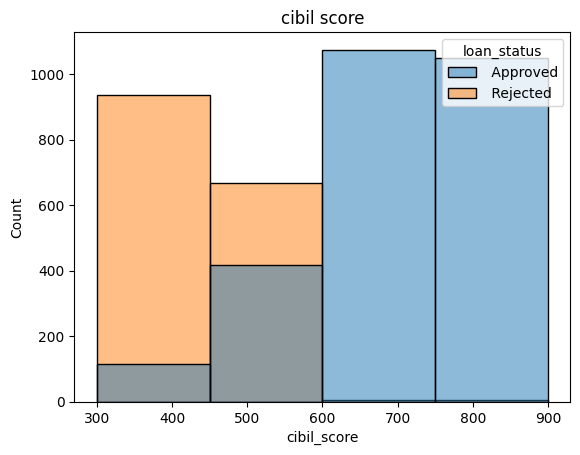

In [33]:
sns.histplot(data=loan_df,x='cibil_score',bins=4,hue='loan_status')
plt.title('cibil score')
plt.show()

<Axes: xlabel='no_of_dependents', ylabel='count'>

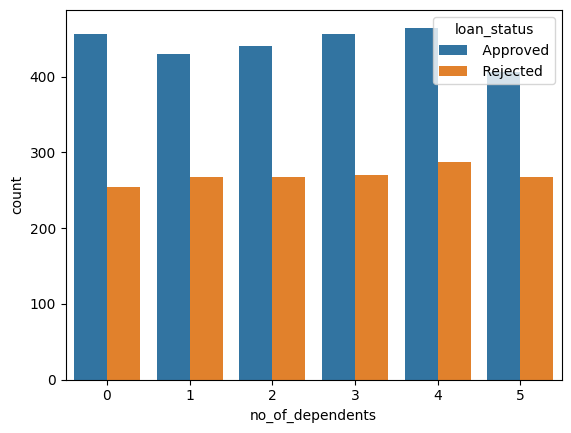

In [34]:
sns.countplot(x = 'no_of_dependents', data = loan_df, hue = 'loan_status')

Text(0.5, 1.0, 'Self Employed')

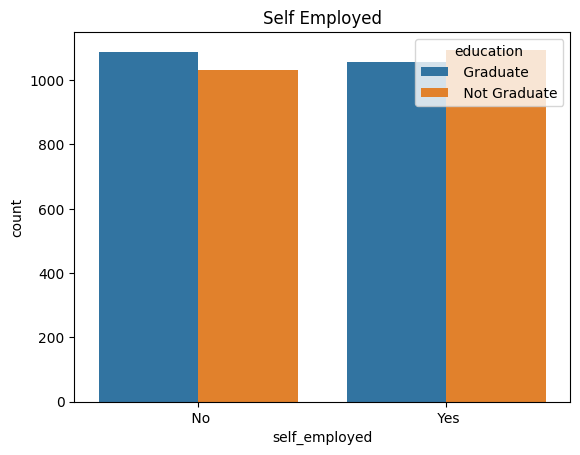

In [35]:
#Effect of employment on loan approval
sns.countplot(x='self_employed', data = loan_df, hue = 'education').set_title('Self Employed')

<Axes: xlabel='loan_term', ylabel='loan_amount'>

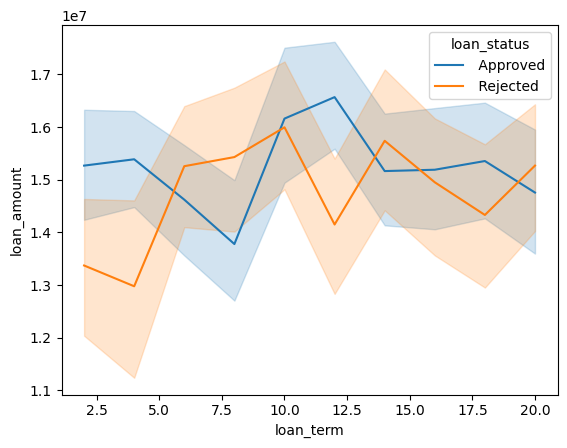

In [36]:
sns.lineplot(x='loan_term', y='loan_amount', data=loan_df, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='cibil_score'>

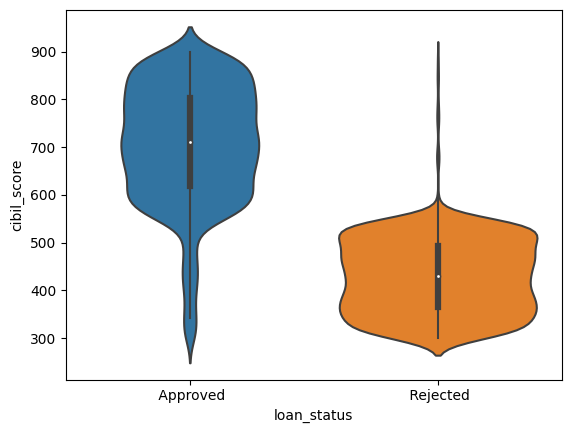

In [37]:
sns.violinplot(x='loan_status', y='cibil_score', data=loan_df)

In [38]:
# Movable Assets
loan_df['Movable_assets'] = loan_df['bank_asset_value'] + loan_df['luxury_assets_value']

#Immovable Assets
loan_df['Immovable_assets'] = loan_df['residential_assets_value'] + loan_df['commercial_assets_value']

<Axes: xlabel='Immovable_assets', ylabel='Count'>

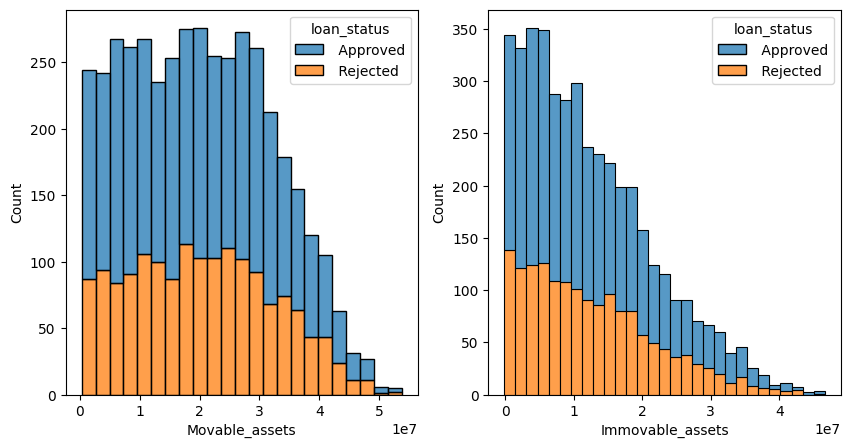

In [39]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(x  = 'Movable_assets', data = loan_df, ax=ax[0], hue = 'loan_status', multiple='stack')
sns.histplot(x =  'Immovable_assets', data = loan_df, ax=ax[1], hue  = 'loan_status', multiple='stack')


<Axes: xlabel='income_annum', ylabel='loan_amount'>

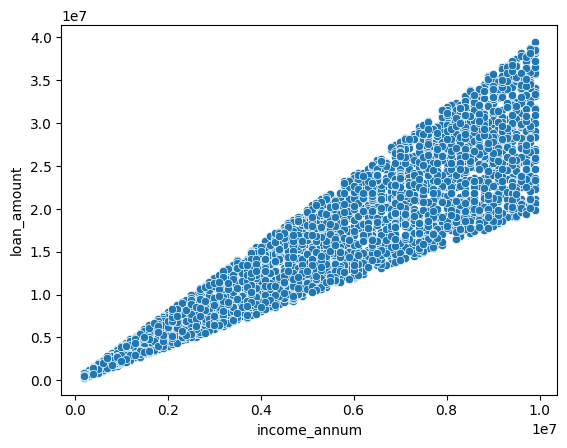

In [40]:
sns.scatterplot(x='income_annum', y = 'loan_amount', data = loan_df)

In [41]:
#Converted the categorical columns to numerical columns
label_encoder = LabelEncoder()
loan_df['education_numeric'] = label_encoder.fit_transform(loan_df['education'])
loan_df['self_employed_numeric'] = label_encoder.fit_transform(loan_df['self_employed'])
loan_df['self_employed'] = loan_df['self_employed_numeric']
loan_df['education'] = loan_df['education_numeric']
loan_df.drop('education_numeric', axis=1, inplace=True)
loan_df.drop('self_employed_numeric', axis=1, inplace=True)
loan_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Movable_assets,Immovable_assets
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,30700000,20000000
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,12100000,4900000
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,46100000,11600000
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,31200000,21500000
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,34400000,20600000


In [42]:
print(loan_df.columns)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'Movable_assets', 'Immovable_assets'],
      dtype='object')


In [43]:
features = [
    'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'
]

In [44]:
target = 'loan_status'

In [45]:
X = loan_df[features]
y = loan_df[target]
X.head(1)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [47]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=0.1,max_iter=100,class_weight='balanced',solver='liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy1*100:.4f}%')

Accuracy: 69.3820%


In [48]:
print(f"Training Score1 for LogisticRegression:{lr.score(X_train,y_train)*100}%")

Training Score1 for LogisticRegression:70.91533895657606%


In [49]:
print(f"Test score1 for LogisticRegression:{lr.score(X_test,y_test)*100}%")

Test score1 for LogisticRegression:69.3820224719101%


In [50]:
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    Approved       0.73      0.81      0.77       678
    Rejected       0.60      0.49      0.54       390

    accuracy                           0.69      1068
   macro avg       0.67      0.65      0.65      1068
weighted avg       0.68      0.69      0.69      1068


Confusion Matrix:
[[551 127]
 [200 190]]


In [51]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier( max_depth=2,min_samples_split=20, min_samples_leaf=10, max_features=0.3, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy2*100:.4f}%')


Accuracy: 96.1610%


In [52]:
print(f"Training Score1 for DecisionTreeClassifier:{dt.score(X_train,y_train)*100}%")

Training Score1 for DecisionTreeClassifier:95.62636676038738%


In [53]:
print(f"Test score1 for DecisionTreeClassifier:{dt.score(X_test,y_test)*100}%")

Test score1 for DecisionTreeClassifier:96.16104868913857%


In [54]:
model = RandomForestClassifier( n_estimators=2,max_depth=3,max_features=0.5,min_samples_split=10,min_samples_leaf=5,    
    bootstrap=True,random_state=42 )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy3*100:.4f}%')

Accuracy: 95.5056%


In [55]:
print(f"Training Score for RandomForestClassifier:{model.score(X_train,y_train)*100}%")

Training Score for RandomForestClassifier:96.18869103405186%


In [56]:
print(f"Test score for RandomForestClassifier:{model.score(X_test,y_test)*100}%")

Test score for RandomForestClassifier:95.50561797752809%


In [57]:
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    Approved       0.97      0.96      0.96       678
    Rejected       0.93      0.94      0.94       390

    accuracy                           0.96      1068
   macro avg       0.95      0.95      0.95      1068
weighted avg       0.96      0.96      0.96      1068


Confusion Matrix:
[[652  26]
 [ 22 368]]


In [58]:
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
import pickle
gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=6)
gbc.fit(X_train, y_train)
with open('model.pickle','wb') as file :
    pickle.dump(gbc,file)
y_pred = gbc.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy4*100:.4f}%')

Accuracy: 98.0337%


In [60]:
print(f"Training Score for GradientBoostingClassifier:{gbc.score(X_train,y_train)*100}%")

Training Score for GradientBoostingClassifier:99.84379881287097%


In [61]:
print(f"Test score for GradientBoostingClassifier:{gbc.score(X_test,y_test)*100}%")

Test score for GradientBoostingClassifier:98.03370786516854%


In [62]:
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    Approved       0.98      0.99      0.98       678
    Rejected       0.98      0.97      0.97       390

    accuracy                           0.98      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.98      0.98      0.98      1068


Confusion Matrix:
[[670   8]
 [ 13 377]]


In [63]:
#Importance of each feature
feature_importances = gbc.feature_importances_
feature_importances

array([1.01492378e-03, 5.31484735e-05, 2.98826829e-04, 9.53622482e-03,
       1.44878350e-02, 7.37820176e-02, 8.87701679e-01, 3.74859106e-03,
       2.83172705e-03, 3.85424103e-03, 2.69078531e-03])

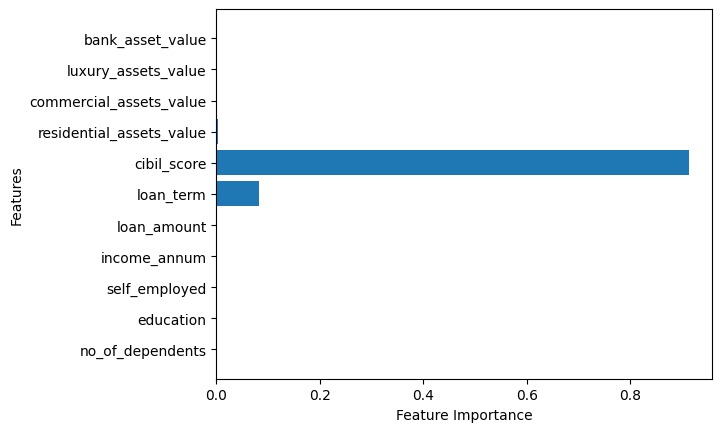

In [64]:
#Plotted the graph of feature impotance
def plot_graph(model):
    n_features = len(features)
    plt.barh(range(n_features),
             model.feature_importances_,
             align='center')
    
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")

plot_graph(model)
plt.show()

In [65]:
with open('model.pickle', 'rb') as file:
    loaded_model = pickle.load(file)
    

In [75]:
sample_row = [
    0,  # no_of_dependents: Example person has 2 dependents
    1,  # education: Assuming this is years of education, 16 could represent a Bachelor's degree
    1,  # self_employed: Assuming binary, 0 means not self-employed, 1 means self-employed
    4100000,  # income_annum: Example income of $50,000 per annum
    12200000,  # loan_amount: Requesting a loan of $150,000
    8,  # loan_term: Loan term of 30 years
    417,  # cibil_score: A CIBIL score of 750, assuming a range of 300-900
    2700000,  # residential_assets_value: $200,000 value in residential assets
    2200000,  # commercial_assets_value: $50,000 value in commercial assets
    8800000,  # luxury_assets_value: $10,000 value in luxury assets
    3300000 # bank_asset_value: $250,000 in bank assets
]

In [76]:
import pandas as pd

features = [
    'no_of_dependents', 'education', 'self_employed',
    'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
    'residential_assets_value', 'commercial_assets_value',
    'luxury_assets_value', 'bank_asset_value'
]

# Create a DataFrame for the sample
sample_df = pd.DataFrame([sample_row], columns=features)

# Now, you can use sample_df to make predictions with your model
# Assuming model is your trained model
prediction = loaded_model.predict(sample_df)
print(prediction)

[' Rejected']
